In [1]:
#     Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
#     separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#     summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [2]:
#     Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
#     separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
#     summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [4]:
#     Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
#     separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
#     summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])


[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [5]:
#     binarization
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
#     separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
#     summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


가장 중요하다고 생각되는 특징데이터만 선택하여 특징데이터의 종류를 줄이기 위한 방법
https://machinelearningmastery.com/feature-selection-machine-learning-python/

4 best features

In [7]:
#     Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#      load data
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
#     feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
#     summarize scores
# set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
#     summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [8]:
#     Feature Extraction with RFE     Recursive Feature Elimination
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#     load data
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
#     feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking:",  fit.ranking_)

Num Features:  3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#     Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
#     load data
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
#     feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
#     summarize components
print("Explained Variance: ",  fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance:  [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [10]:
#     Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
#     load data
filename = 'C:/Users/In-Ho Lee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
#     feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.107 0.242 0.098 0.08  0.075 0.138 0.12  0.14 ]


https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/
무작위 추출 조사

마우스 캡처 --> 탭 --> 시프트 탭

Defined 53 models
>logistic: 0.848 (+/-0.034)
>ridge-0.1: 0.845 (+/-0.038)
>ridge-0.2: 0.845 (+/-0.038)
>ridge-0.3: 0.845 (+/-0.038)
>ridge-0.4: 0.845 (+/-0.038)
>ridge-0.5: 0.845 (+/-0.038)
>ridge-0.6: 0.845 (+/-0.038)
>ridge-0.7: 0.846 (+/-0.039)
>ridge-0.8: 0.847 (+/-0.039)
>ridge-0.9: 0.847 (+/-0.039)
>ridge-1.0: 0.847 (+/-0.039)
>sgd: 0.824 (+/-0.036)
>pa: 0.809 (+/-0.058)
>knn-1: 0.726 (+/-0.040)
>knn-2: 0.688 (+/-0.026)
>knn-3: 0.741 (+/-0.036)
>knn-4: 0.726 (+/-0.027)
>knn-5: 0.768 (+/-0.035)
>knn-6: 0.755 (+/-0.028)
>knn-7: 0.769 (+/-0.038)
>knn-8: 0.761 (+/-0.045)
>knn-9: 0.772 (+/-0.042)
>knn-10: 0.765 (+/-0.040)
>knn-11: 0.781 (+/-0.043)
>knn-12: 0.780 (+/-0.045)
>knn-13: 0.789 (+/-0.036)
>knn-14: 0.788 (+/-0.036)
>knn-15: 0.800 (+/-0.045)
>knn-16: 0.791 (+/-0.039)
>knn-17: 0.799 (+/-0.027)
>knn-18: 0.796 (+/-0.031)
>knn-19: 0.799 (+/-0.033)
>knn-20: 0.801 (+/-0.035)
>cart: 0.792 (+/-0.038)
>extra: 0.715 (+/-0.048)
>svml: 0.841 (+/-0.035)
>svmp: 0.810 (+/-0.048)
>svmr0.1: 0

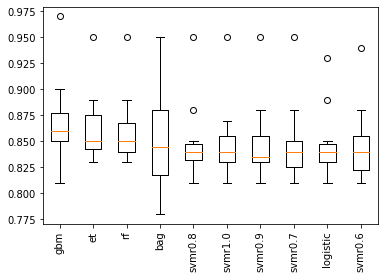

In [11]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# load the dataset, returns X and y elements
def load_dataset():
    return make_classification(n_samples=1000, n_classes=2, random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('C:/Users/In-Ho Lee/testAI/spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import KFold
# #     Spot-Check Algorithms
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# #     evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits=10, shuffle=True, random_state=77)
#     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)


C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass l1_ratio=0.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass l1_ratio=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass l1_ratio=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\sklearn\utils\validation.py:70: Future

Defined 190 models
>lr: -0.011 (+/-0.001)
>lasso-0.0: -0.011 (+/-0.001)
>lasso-0.1: -4.756 (+/-0.808)
>lasso-0.2: -18.996 (+/-3.268)
>lasso-0.3: -42.730 (+/-7.379)
>lasso-0.4: -75.957 (+/-13.144)
>lasso-0.5: -118.679 (+/-20.561)
>lasso-0.6: -170.895 (+/-29.631)
>lasso-0.7: -232.605 (+/-40.354)
>lasso-0.8: -303.810 (+/-52.729)
>lasso-0.9: -384.509 (+/-66.757)
>lasso-1.0: -474.701 (+/-82.438)
>ridge-0.0: -0.011 (+/-0.001)
>ridge-0.1: -0.902 (+/-0.167)
>ridge-0.2: -3.534 (+/-0.668)
>ridge-0.3: -7.847 (+/-1.492)
>ridge-0.4: -13.780 (+/-2.628)
>ridge-0.5: -21.277 (+/-4.064)
>ridge-0.6: -30.283 (+/-5.788)
>ridge-0.7: -40.744 (+/-7.790)
>ridge-0.8: -52.610 (+/-10.059)
>ridge-0.9: -65.831 (+/-12.586)
>ridge-1.0: -80.359 (+/-15.361)
>en-0.0-0.0: -0.011 (+/-0.001)
>en-0.0-0.1: -0.011 (+/-0.001)
>en-0.0-0.2: -0.011 (+/-0.001)
>en-0.0-0.3: -0.011 (+/-0.001)
>en-0.0-0.4: -0.011 (+/-0.001)
>en-0.0-0.5: -0.011 (+/-0.001)
>en-0.0-0.6: -0.011 (+/-0.001)
>en-0.0-0.7: -0.011 (+/-0.001)
>en-0.0-0.8: -0.01

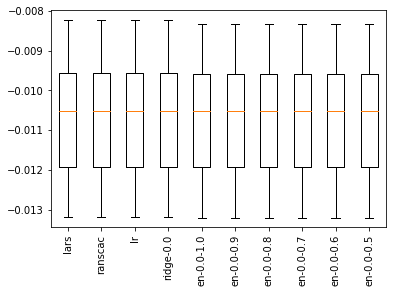

In [12]:
# regression spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# load the dataset, returns X and y elements
def load_dataset():
	return make_regression(n_samples=1000, n_features=50, noise=0.1, random_state=1)

# create a dict of standard models to evaluate {name:object}
def get_models(models=dict()):
	# linear models
	models['lr'] = LinearRegression()
	alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['lasso-'+str(a)] = Lasso(alpha=a)
	for a in alpha:
		models['ridge-'+str(a)] = Ridge(alpha=a)
	for a1 in alpha:
		for a2 in alpha:
			name = 'en-' + str(a1) + '-' + str(a2)
			models[name] = ElasticNet(a1, a2)
	models['huber'] = HuberRegressor()
	models['lars'] = Lars()
	models['llars'] = LassoLars()
	models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
	models['ranscac'] = RANSACRegressor()
	models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
	models['theil'] = TheilSenRegressor()
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
	models['cart'] = DecisionTreeRegressor()
	models['extra'] = ExtraTreeRegressor()
	models['svml'] = SVR(kernel='linear')
	models['svmp'] = SVR(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVR(C=c)
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
	models['bag'] = BaggingRegressor(n_estimators=n_trees)
	models['rf'] = RandomForestRegressor(n_estimators=n_trees)
	models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
	models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')

# load dataset
X, y = load_dataset()
# get model list
models = get_models()
# evaluate models
results = evaluate_models(X, y, models, metric='neg_mean_squared_error')
# summarize results
summarize_results(results)